<font size=22>**Decision Tree based models**</font>

# Imports

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_validate


from sklearn.compose import ColumnTransformer


In [145]:
df = pd.read_csv('../processed_data/cleaned_data_final.csv')


In [146]:
df.head(4)


,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47


In [147]:
X = df
X = X.drop(columns = ["name",'isAlive','episode','deaths','season',
       'episode_num'], axis=1)


In [148]:
X.columns


Index(['male', 'origin', 'isMarried', 'isNoble', 'popularity'], dtype='object')

In [149]:
y = df[["isAlive"]]

y.head()


,isAlive
0,0
1,0
2,1
3,0
4,1


In [150]:
y.value_counts(dropna=False, normalize=True)


isAlive
1          0.714726
0          0.285274
Name: proportion, dtype: float64

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


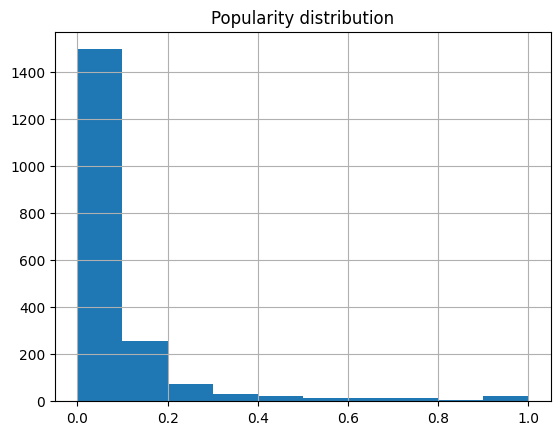

In [152]:
X.popularity.hist()
plt.title("Popularity distribution");


# Preprocessor

In [153]:
# Features that do not need transformation
no_transformation_features = ['male', 'isMarried','isNoble','popularity']

# Categorical features --> OneHotEncoder
X_cat = X_train.select_dtypes(include = ['object']).columns.tolist()

# Ordinal features --> MinMax Scaler
X_ord = [col for col in X_train.columns if col not in no_transformation_features and col not in X_cat]
X_ord

print(f'X_ord: {X_ord}; \nX_cat: {X_cat}; \nno transf: {no_transformation_features}' )


X_ord: []; 
X_cat: ['origin']; 
no transf: ['male', 'isMarried', 'isNoble', 'popularity']


In [154]:
# Impute then scale numerical values:
num_transformer = Pipeline(steps=[
    ('Standard_scaler', StandardScaler())
])

# Encode categorical values
cat_transformer = Pipeline(steps=[
    ('OHE', OneHotEncoder(handle_unknown='ignore',sparse_output=False))

])

# Parallelize "num_transformer" and "cat_transfomer"
preproc_baseline = ColumnTransformer(
    transformers = [
        #('num_transformer', num_transformer, X_ord),
        ('cat_transformer', cat_transformer, X_cat),
        ('passthrough', 'passthrough', no_transformation_features)
    ]
)


In [155]:
preproc_baseline


ColumnTransformer(transformers=[('cat_transformer',
                                 Pipeline(steps=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['origin']),
                                ('passthrough', 'passthrough',
                                 ['male', 'isMarried', 'isNoble',
                                  'popularity'])])

In [156]:
preproc_baseline.fit_transform(X_train)


array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.00334448],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07023411],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.05351171],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01672241],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.49498328]])

In [157]:
X_train_proc = pd.DataFrame(preproc_baseline.fit_transform(X_train),
            columns=preproc_baseline.get_feature_names_out())


In [158]:
X_train_proc.head(5)


,cat_transformer__origin_Dothraki,cat_transformer__origin_Foreign Noble,cat_transformer__origin_Foreign Peasant,cat_transformer__origin_House Arryn,cat_transformer__origin_House Baratheon,cat_transformer__origin_House Bolton,cat_transformer__origin_House Frey,cat_transformer__origin_House Greyjoy,cat_transformer__origin_House Lannister,cat_transformer__origin_House Martell,...,cat_transformer__origin_Night's Watch,cat_transformer__origin_Noble,cat_transformer__origin_Outlaw,cat_transformer__origin_Peasant,cat_transformer__origin_Soldier,cat_transformer__origin_Wildling,passthrough__male,passthrough__isMarried,passthrough__isNoble,passthrough__popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.003344
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.070234
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.086957
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.063545


In [159]:
X_train_proc.shape, X.shape


((1364, 24), (1949, 5))

In [160]:
y_train.value_counts(dropna=False, normalize=True)


isAlive
1          0.714809
0          0.285191
Name: proportion, dtype: float64

In [161]:
y_test.value_counts(dropna=False, normalize=True)


isAlive
1          0.71453
0          0.28547
Name: proportion, dtype: float64

# Random forest

## Baseline Random forest model (model_rf)

### Random Forest without class_weight

In [162]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=5)


### Cross-validation

In [163]:

cv_results = cross_validate(model_rf, X_train_proc, y_train, scoring = ['accuracy', 'f1', 'roc_auc','recall','precision'], cv=5)

cv_results
for i in cv_results:
    print(f' {i}: {cv_results[i].mean()}')


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/3.10.6/

 fit_time: 0.45448718070983884
 score_time: 0.150575590133667
 test_accuracy: 0.7558688860159448
 test_f1: 0.8498717615624773
 test_roc_auc: 0.738926628926629
 test_recall: 0.9682051282051283
 test_precision: 0.7576384500080162


In [164]:
model_rf.fit(X_train_proc,y_train)


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_leaf=5)

In [165]:
model_rf.score(preproc_baseline.transform(X_test), y_test)


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7521367521367521

In [166]:
y_pred = model_rf.predict(preproc_baseline.transform(X_test))


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [167]:
y_test.columns, y_test.shape, y_pred.shape


(Index(['isAlive'], dtype='object'), (585, 1), (585,))

In [168]:
correct_predictions = (y_pred == y_test['isAlive']).sum()
print(f"Number of correct predictions: {correct_predictions} \n Percentage: {correct_predictions/y_test.shape[0]}")


Number of correct predictions: 440 
 Percentage: 0.7521367521367521


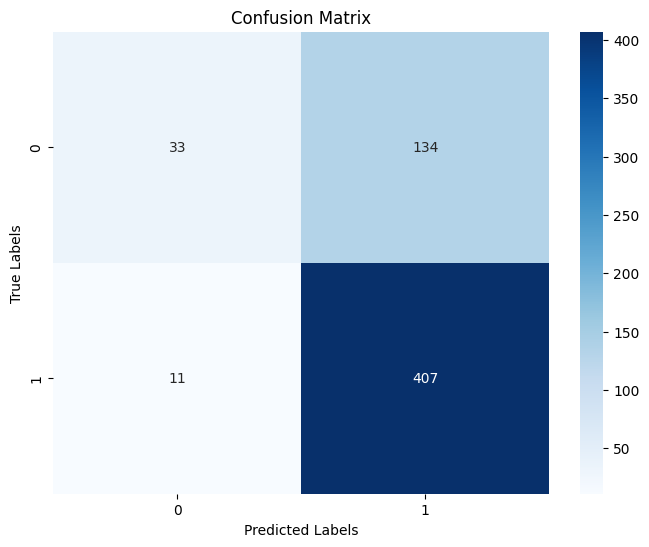

In [169]:
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn for better aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [170]:


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.20      0.31       167
           1       0.75      0.97      0.85       418

    accuracy                           0.75       585
   macro avg       0.75      0.59      0.58       585
weighted avg       0.75      0.75      0.70       585



In [171]:
TN, FP, FN, TP = cm.ravel()

percentage_correct_0 = TN / (TN + FP) * 100
percentage_correct_1 = TP / (TP + FN) * 100

print(f"Percentage of correct predictions for label 0: {percentage_correct_0:.2f}%")
print(f"Percentage of correct predictions for label 1: {percentage_correct_1:.2f}%")


Percentage of correct predictions for label 0: 19.76%
Percentage of correct predictions for label 1: 97.37%


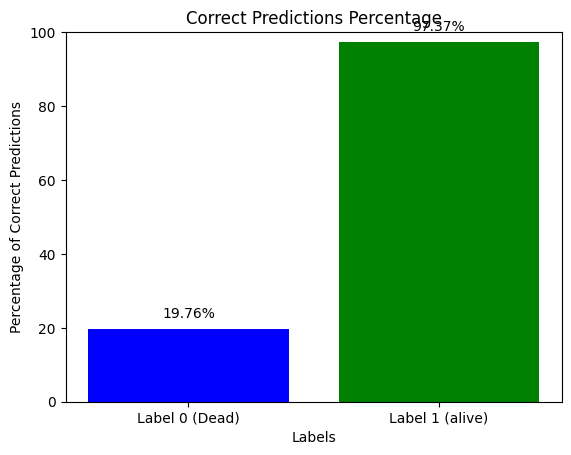

In [172]:
labels = ['Label 0 (Dead)', 'Label 1 (alive)']
percentages = [percentage_correct_0, percentage_correct_1]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Correct Predictions Percentage')
plt.ylim(0, 100)  # Optional: set the y-axis to range from 0 to 100
for i, v in enumerate(percentages):
    plt.text(i, v + 3, f"{v:.2f}%", ha='center')  # Add text for each bar
plt.show()


In [173]:
y.value_counts(dropna=False, normalize=True)


isAlive
1          0.714726
0          0.285274
Name: proportion, dtype: float64

# Random Forest class_weight='balanced'

In [174]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=5,class_weight='balanced')


### Cross-validation

In [175]:

cv_results = cross_validate(model_rf, X_train_proc, y_train, scoring = ['accuracy', 'f1', 'roc_auc','recall','precision'], cv=5)

cv_results
for i in cv_results:
    print(f' {i}: {cv_results[i].mean()}')


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/3.10.6/

 fit_time: 0.4751326084136963
 score_time: 0.1385514259338379
 test_accuracy: 0.7001723766429648
 test_f1: 0.777127298123053
 test_roc_auc: 0.7465582280966897
 test_recall: 0.7333333333333332
 test_precision: 0.827911094028377


In [176]:
model_rf.fit(X_train_proc,y_train)


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5)

In [177]:
model_rf.score(preproc_baseline.transform(X_test), y_test)


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7162393162393162

In [178]:
y_pred = model_rf.predict(preproc_baseline.transform(X_test))


/Users/Carmen/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [179]:
y_test.columns, y_test.shape, y_pred.shape


(Index(['isAlive'], dtype='object'), (585, 1), (585,))

In [180]:
correct_predictions = (y_pred == y_test['isAlive']).sum()
print(f"Number of correct predictions: {correct_predictions} \n Percentage: {correct_predictions/y_test.shape[0]}")


Number of correct predictions: 419 
 Percentage: 0.7162393162393162


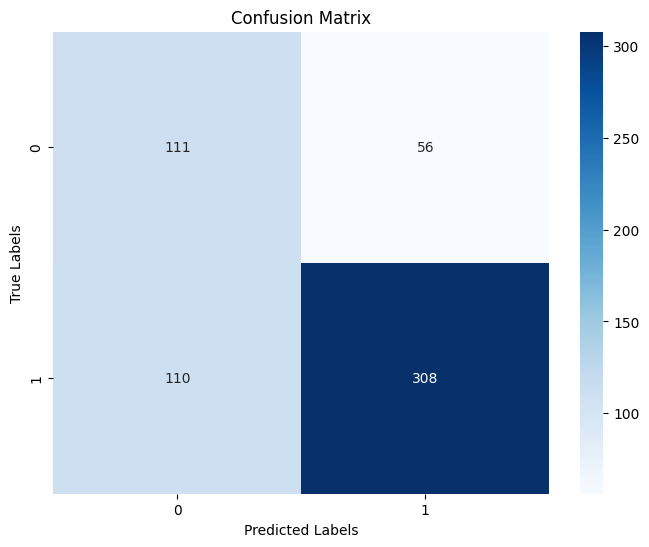

In [181]:
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn for better aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [182]:


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.66      0.57       167
           1       0.85      0.74      0.79       418

    accuracy                           0.72       585
   macro avg       0.67      0.70      0.68       585
weighted avg       0.75      0.72      0.73       585



In [183]:
TN, FP, FN, TP = cm.ravel()

percentage_correct_0 = TN / (TN + FP) * 100
percentage_correct_1 = TP / (TP + FN) * 100

print(f"Percentage of correct predictions for label 0: {percentage_correct_0:.2f}%")
print(f"Percentage of correct predictions for label 1: {percentage_correct_1:.2f}%")


Percentage of correct predictions for label 0: 66.47%
Percentage of correct predictions for label 1: 73.68%


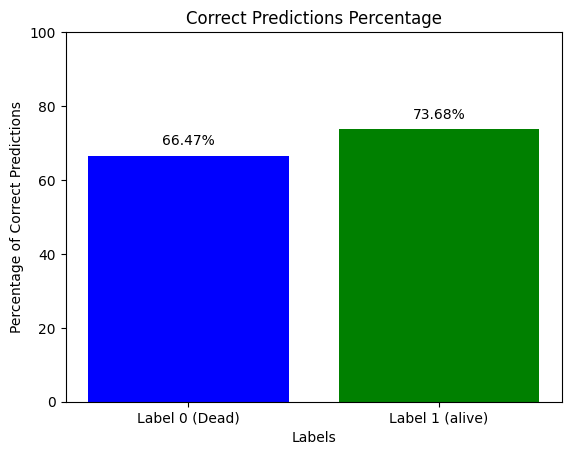

In [184]:
labels = ['Label 0 (Dead)', 'Label 1 (alive)']
percentages = [percentage_correct_0, percentage_correct_1]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Correct Predictions Percentage')
plt.ylim(0, 100)  # Optional: set the y-axis to range from 0 to 100
for i, v in enumerate(percentages):
    plt.text(i, v + 3, f"{v:.2f}%", ha='center')  # Add text for each bar
plt.show()


In [185]:
y.value_counts(dropna=False, normalize=True)


isAlive
1          0.714726
0          0.285274
Name: proportion, dtype: float64

## Pipeline and GridSearch

In [186]:
# Define the Random Forest classifier pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preproc_baseline),
    ('classifier', RandomForestClassifier(random_state=42,class_weight='balanced'))
])


In [187]:
param_grid_rf = {
    'classifier__n_estimators': [200,300, 400],
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10, 15,20]
}

# Grid search with cross-validation
grid_search_rf = GridSearchCV(rf_pipeline,
                              param_grid_rf,
                              cv=5,
                              scoring=['accuracy', 'f1','recall', 'precision','roc_auc','f1_macro'],
                              n_jobs=-1,
                              refit='f1_macro')
grid_search_rf.fit(X_train, y_train.values.ravel())

# Best parameters and best score
print("Best parameters (Random Forest):", grid_search_rf.best_params_)
print("Best score (Random Forest):", grid_search_rf.best_score_)


Best parameters (Random Forest): {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best score (Random Forest): 0.6748239671146483


In [188]:
grid_search_rf.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__max_depth', 'param_classifier__min_samples_split', 'param_classifier__n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'mean_

In [189]:
print(f"""mean_test_f1_macro: {grid_search_rf.cv_results_['mean_test_f1_macro'].mean()}
mean_test_accuracy: {grid_search_rf.cv_results_['mean_test_accuracy'].mean()}
mean_test_f1: {grid_search_rf.cv_results_['mean_test_f1'].mean()}
mean_test_recall: {grid_search_rf.cv_results_['mean_test_recall'].mean()}
mean_test_precision: {grid_search_rf.cv_results_['mean_test_precision'].mean()}
mean_test_roc_auc: {grid_search_rf.cv_results_['mean_test_roc_auc'].mean()}""")


mean_test_f1_macro: 0.6548297681903575
mean_test_accuracy: 0.7081428930546577
mean_test_f1: 0.7899223907575826
mean_test_recall: 0.7684649572649572
mean_test_precision: 0.813724630431224
mean_test_roc_auc: 0.7404763453071145


In [190]:
grid_search_rf.best_params_


{'classifier__max_depth': 5,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

### Best Model GridSearch predictions

In [191]:
# Access the model with the best found parameters
best_model = grid_search_rf.best_estimator_


In [192]:
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['origin']),
                                                 ('passthrough', 'passthrough',
                                                  ['male', 'isMarried',
                                                   'isNoble',
                                                   'popularity'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

In [ ]:
best_model.score(preproc_baseline.transform(X_test), y_test)


In [193]:
y_pred_best_model = best_model.predict(X_test)


Number of correct predictions: 416 
 Percentage: 0.7111111111111111


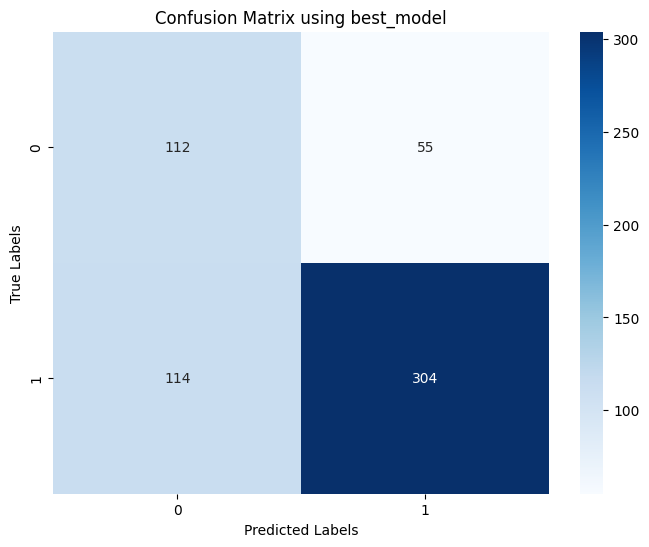

In [194]:

correct_predictions = (y_pred_best_model == y_test['isAlive']).sum()
print(f"Number of correct predictions: {correct_predictions} \n Percentage: {correct_predictions/y_test.shape[0]}")

cm = confusion_matrix(y_test, y_pred_best_model)

# Plotting using seaborn for better aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix using best_model")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [195]:
TN, FP, FN, TP = cm.ravel()

percentage_correct_0 = TN / (TN + FP) * 100
percentage_correct_1 = TP / (TP + FN) * 100

print(f"Percentage of correct predictions for label 0: {percentage_correct_0:.2f}%")
print(f"Percentage of correct predictions for label 1: {percentage_correct_1:.2f}%")


Percentage of correct predictions for label 0: 67.07%
Percentage of correct predictions for label 1: 72.73%


In [196]:
print('Accuracy =', round(accuracy_score(y_test, y_pred_best_model), 2)) # Accuracy

print('Precision =', round(precision_score(y_test, y_pred_best_model), 2)) # Precision

print('Recall =', round(recall_score(y_test, y_pred_best_model), 2)) # Recall

print('F1 score =', round(f1_score(y_test, y_pred_best_model), 2))


Accuracy = 0.71
Precision = 0.85
Recall = 0.73
F1 score = 0.78


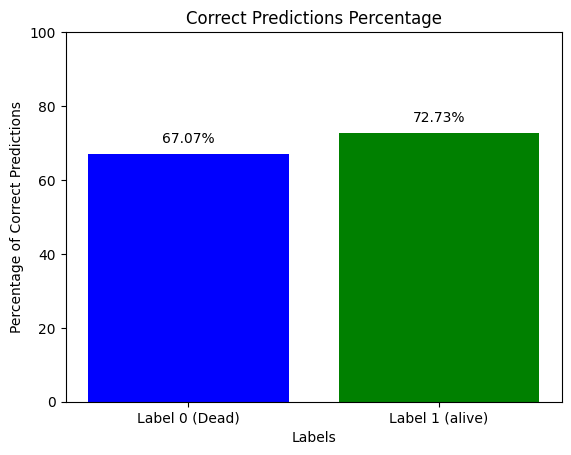

In [197]:
labels = ['Label 0 (Dead)', 'Label 1 (alive)']
percentages = [percentage_correct_0, percentage_correct_1]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Correct Predictions Percentage')
plt.ylim(0, 100)  # Optional: set the y-axis to range from 0 to 100
for i, v in enumerate(percentages):
    plt.text(i, v + 3, f"{v:.2f}%", ha='center')  # Add text for each bar
plt.show()


In [198]:
print(classification_report(y_test, y_pred_best_model))


              precision    recall  f1-score   support

           0       0.50      0.67      0.57       167
           1       0.85      0.73      0.78       418

    accuracy                           0.71       585
   macro avg       0.67      0.70      0.68       585
weighted avg       0.75      0.71      0.72       585



## Randomized Search

In [199]:
# Define the parameter distributions for Randomized Search
param_dist_rf = {
    'classifier__n_estimators': randint(220, 300),  # 401 is exclusive
    'classifier__max_depth': randint(20, 35),       # 31 is exclusive
    'classifier__min_samples_split': randint(10, 20) # 16 is exclusive
}

# Set up Randomized Search with cross-validation
random_search_rf = RandomizedSearchCV(rf_pipeline,
                                      param_distributions=param_dist_rf,
                                      n_iter=200,  # Number of parameter settings sampled
                                      cv=5,
                                      scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc', 'f1_macro'],
                                      n_jobs=-1,
                                      refit='f1_macro',
                                      random_state=42)
random_search_rf.fit(X_train, y_train.values.ravel())

# Best parameters and best score
print("Best parameters (Random Forest):", random_search_rf.best_params_)
print("Best score (Random Forest):", random_search_rf.best_score_)


Best parameters (Random Forest): {'classifier__max_depth': 31, 'classifier__min_samples_split': 12, 'classifier__n_estimators': 282}
Best score (Random Forest): 0.6598398318513461


### Best Model RandomSearch predictions

In [200]:
# Access the model with the best found parameters
best_model = random_search_rf.best_estimator_


In [201]:
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['origin']),
                                                 ('passthrough', 'passthrough',
                                                  ['male', 'isMarried',
                                                   'isNoble',
                                                   'popularity'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=31,
                                        min_samples_split=12, n_estimators=282,
                                        random_state=42))])

In [202]:
y_pred_best_model = best_model.predict(X_test)


Number of correct predictions: 409 
 Percentage: 0.6991452991452991


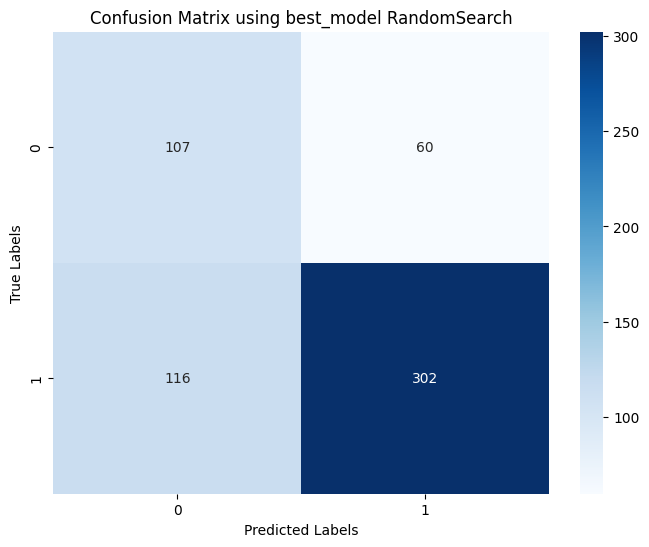

In [203]:

correct_predictions = (y_pred_best_model == y_test['isAlive']).sum()
print(f"Number of correct predictions: {correct_predictions} \n Percentage: {correct_predictions/y_test.shape[0]}")

cm = confusion_matrix(y_test, y_pred_best_model)

# Plotting using seaborn for better aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix using best_model RandomSearch")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [204]:
TN, FP, FN, TP = cm.ravel()

percentage_correct_0 = TN / (TN + FP) * 100
percentage_correct_1 = TP / (TP + FN) * 100

print(f"Percentage of correct predictions for label 0: {percentage_correct_0:.2f}%")
print(f"Percentage of correct predictions for label 1: {percentage_correct_1:.2f}%")


Percentage of correct predictions for label 0: 64.07%
Percentage of correct predictions for label 1: 72.25%


In [205]:
print('Accuracy =', round(accuracy_score(y_test, y_pred_best_model), 2)) # Accuracy

print('Precision =', round(precision_score(y_test, y_pred_best_model), 2)) # Precision

print('Recall =', round(recall_score(y_test, y_pred_best_model), 2)) # Recall

print('F1 score =', round(f1_score(y_test, y_pred_best_model), 2))


Accuracy = 0.7
Precision = 0.83
Recall = 0.72
F1 score = 0.77


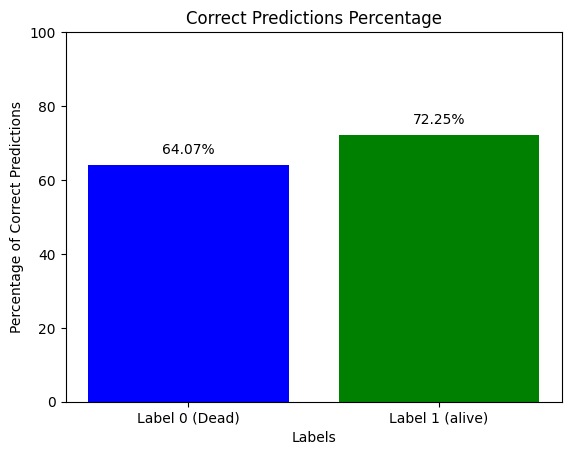

In [206]:
labels = ['Label 0 (Dead)', 'Label 1 (alive)']
percentages = [percentage_correct_0, percentage_correct_1]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Correct Predictions Percentage')
plt.ylim(0, 100)  # Optional: set the y-axis to range from 0 to 100
for i, v in enumerate(percentages):
    plt.text(i, v + 3, f"{v:.2f}%", ha='center')  # Add text for each bar
plt.show()


In [207]:
print(classification_report(y_test, y_pred_best_model))


              precision    recall  f1-score   support

           0       0.48      0.64      0.55       167
           1       0.83      0.72      0.77       418

    accuracy                           0.70       585
   macro avg       0.66      0.68      0.66       585
weighted avg       0.73      0.70      0.71       585



# Changing y from isAlive to isDead (swapping 0 for 1 and the other way around)

In [208]:
y.isAlive.value_counts(dropna=False,normalize=True)


isAlive
1    0.714726
0    0.285274
Name: proportion, dtype: float64

In [209]:
y2 =  pd.DataFrame({'isDead': 1 - df['isAlive']})
y2.isDead.value_counts(dropna=False,normalize=True)


isDead
0    0.714726
1    0.285274
Name: proportion, dtype: float64

In [210]:
X = df
X = X.drop(columns = ["name",'isAlive','episode','deaths','season',
       'episode_num'], axis=1)
X.columns


Index(['male', 'origin', 'isMarried', 'isNoble', 'popularity'], dtype='object')

In [211]:
y = y2[["isDead"]]

y.head()


,isDead
0,1
1,1
2,0
3,1
4,0


In [212]:
y.value_counts(dropna=False, normalize=True)


isDead
0         0.714726
1         0.285274
Name: proportion, dtype: float64

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Random search for isDead as y

In [214]:
# Define the parameter distributions for Randomized Search
param_dist_rf = {
    'classifier__n_estimators': randint(220, 300),  # 401 is exclusive
    'classifier__max_depth': randint(20, 35),       # 31 is exclusive
    'classifier__min_samples_split': randint(10, 20) # 16 is exclusive
}

# Set up Randomized Search with cross-validation
random_search_rf = RandomizedSearchCV(rf_pipeline,
                                      param_distributions=param_dist_rf,
                                      n_iter=200,  # Number of parameter settings sampled
                                      cv=5,
                                      scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc', 'f1_macro'],
                                      n_jobs=-1,
                                      refit='f1_macro',
                                      random_state=42)
random_search_rf.fit(X_train, y_train.values.ravel())

# Best parameters and best score
print("Best parameters (Random Forest):", random_search_rf.best_params_)
print("Best score (Random Forest):", random_search_rf.best_score_)


Best parameters (Random Forest): {'classifier__max_depth': 22, 'classifier__min_samples_split': 16, 'classifier__n_estimators': 259}
Best score (Random Forest): 0.6848836970156175


### y = isDead --> Best Model RandomSearch predictions

In [215]:
# Access the model with the best found parameters
best_model = random_search_rf.best_estimator_


In [216]:
best_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['origin']),
                                                 ('passthrough', 'passthrough',
                                                  ['male', 'isMarried',
                                                   'isNoble',
                                                   'popularity'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=22,
                                        min_samples_split=16, n_estimators=259,
                                        random_state=42))])

In [225]:
best_model.score(X_test, y_test)


0.7042735042735043

In [217]:
y_pred_best_model = best_model.predict(X_test)


Number of correct predictions: 412 
 Percentage: 0.7042735042735043


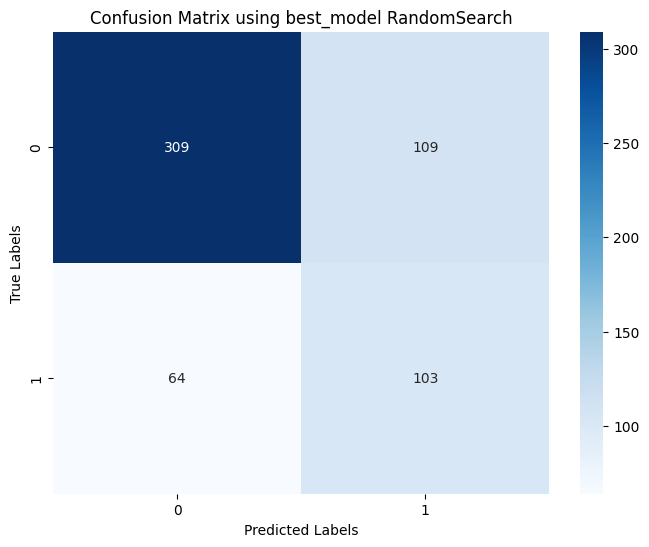

In [218]:

correct_predictions = (y_pred_best_model == y_test['isDead']).sum()
print(f"Number of correct predictions: {correct_predictions} \n Percentage: {correct_predictions/y_test.shape[0]}")

cm = confusion_matrix(y_test, y_pred_best_model)

# Plotting using seaborn for better aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix using best_model RandomSearch")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [219]:
TN, FP, FN, TP = cm.ravel()

percentage_correct_0 = TN / (TN + FP) * 100
percentage_correct_1 = TP / (TP + FN) * 100

print(f"Percentage of correct predictions for label 0: {percentage_correct_0:.2f}%")
print(f"Percentage of correct predictions for label 1: {percentage_correct_1:.2f}%")


Percentage of correct predictions for label 0: 73.92%
Percentage of correct predictions for label 1: 61.68%


In [220]:
print('Accuracy =', round(accuracy_score(y_test, y_pred_best_model), 2)) # Accuracy

print('Precision =', round(precision_score(y_test, y_pred_best_model), 2)) # Precision

print('Recall =', round(recall_score(y_test, y_pred_best_model), 2)) # Recall

print('F1 score =', round(f1_score(y_test, y_pred_best_model), 2))


Accuracy = 0.7
Precision = 0.49
Recall = 0.62
F1 score = 0.54


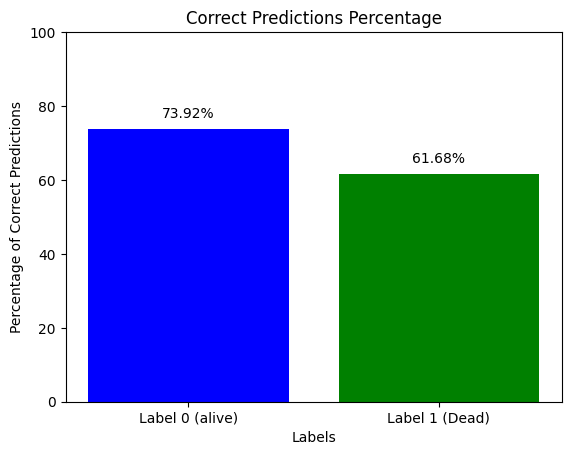

In [221]:
labels = ['Label 0 (alive)', 'Label 1 (Dead)']
percentages = [percentage_correct_0, percentage_correct_1]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Correct Predictions Percentage')
plt.ylim(0, 100)  # Optional: set the y-axis to range from 0 to 100
for i, v in enumerate(percentages):
    plt.text(i, v + 3, f"{v:.2f}%", ha='center')  # Add text for each bar
plt.show()


0 is Alive

1 is Dead

In [223]:
print(classification_report(y_test, y_pred_best_model))


              precision    recall  f1-score   support

           0       0.83      0.74      0.78       418
           1       0.49      0.62      0.54       167

    accuracy                           0.70       585
   macro avg       0.66      0.68      0.66       585
weighted avg       0.73      0.70      0.71       585



In [226]:
x = model_rf


In [229]:
import inspect


In [230]:
def find_var_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

# Example usage
x = model_rf

var_names = find_var_name(x)
if var_names:
    print(f"This would be the string: {var_names[0]}")
else:
    print("Variable name not found.")


This would be the string: model_rf
